# 최소 제곱법

In [45]:
import numpy as np

# 이상치 미존재
x1 = np.array([10, 9, 3, 2]) # 공부시간
y1 = np.array([90, 80, 50, 30]) # 점수

# 이상치 존재
x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30,40])

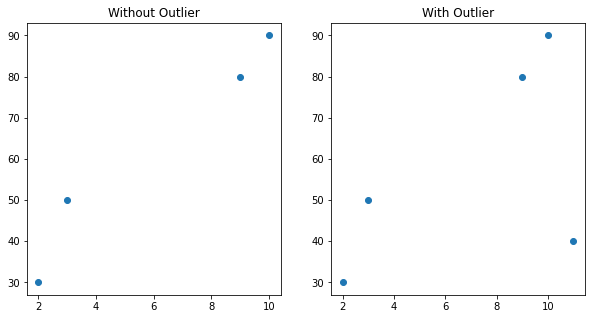

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')
plt.show()

In [47]:
def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)
    b = y.mean() - w * x.mean()
    return w, b

## 직접 구현

### 정의된 함수를 이용하여 가중치와 편향 값 계산

In [4]:
w1, b1 = OLS(x1, y1)
w1, b1

(6.6, 22.900000000000006)

In [5]:
w2, b2 = OLS(x2, y2)
w2, b2

(3.4285714285714284, 34.0)

### 계산된 가중치와 편향 값을 이용하여 예측 값 계산

In [6]:
x1_pred = x1 * w1 + b1
x2_pred = x2 * w2 + b2

x1_pred, x2_pred

(array([88.9, 82.3, 42.7, 36.1]),
 array([68.28571429, 64.85714286, 44.28571429, 40.85714286, 71.71428571]))

### 시각화

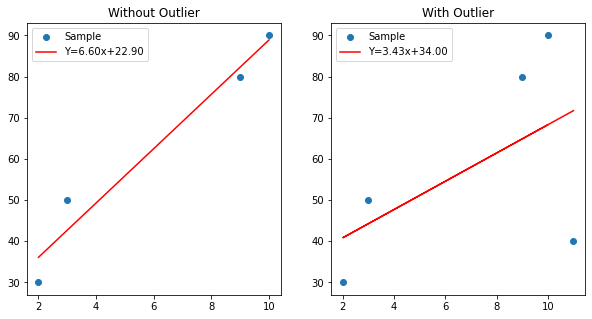

In [48]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')
plt.plot(x1, x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.title('With Outlier')
plt.legend()
plt.show()

## scikit-learn 이용

In [49]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x1.reshape(-1, 1), y1)
# reshape안해주면 [10, 9, 3, 2] 싹다 들어가게 된다. 2차원배열의 한 행씩 넣어줘야 함
# reshape(-1, 1)에서 1은 열 하나당 데이터 1개인거고 -1은 그거에 맞춰서 행개수 조절

model1.coef_, model1.intercept_ # 그래프가 22.89부터 시작

(array([6.6]), 22.899999999999984)

# Boston house prices dataset

In [50]:
from sklearn.datasets import load_boston
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore') # warnings 끄기 (action='default') warnings 켜기

boston = load_boston()
boston_df = pd.DataFrame(
    boston['data'],
    columns=boston['feature_names']
)

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [51]:
boston_df['price'] = boston['target']

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 선형회귀 모델링

In [54]:
y = boston_df['price']
X = boston_df.drop(columns='price')

# # 표준화
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_sc = scaler.fit_transform(X) #전체의 표준편차, 평균을 구해서 바꾸는 것
# # x_tr_sc = scaler.fit_transform(x_tr)
# # x_te_sc = scaler.transform(x_te)

# # 정규화
# from sklearn.preprocessing import MinMaxScaler
# sclaer = MinMaxScaler()
# x_tr_sc = scaler.fit_transform(x_tr)

### 이상치 처리

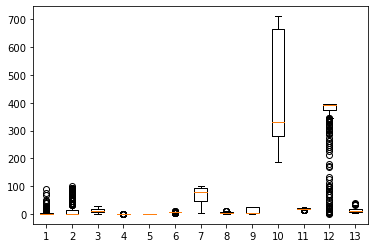

In [19]:
# 이상치 제거

import matplotlib.pyplot as plt
# plt.boxplot(boston_df['B'])
plt.boxplot(boston['data'])
plt.show()

In [20]:
Q1 = boston_df['B'].quantile(0.25) # IQR 계산
Q3 = boston_df['B'].quantile(0.75)

IQR = Q3 - Q1
MAX = Q3 + 1.5 * IQR
MIN = Q1 - 1.5 * IQR

MIN, MAX

(369.42500000000007, 413.3849999999999)

In [21]:
# 이상치 조회
target = boston_df['B'][
    (boston_df['B'] < MIN) | (boston_df['B'] > MAX)
]

target

30     360.17
33     358.77
95     357.98
115    344.91
126    359.29
148    356.99
149    351.85
157    363.43
158    353.89
159    364.31
166    369.30
171    348.13
197    354.31
214    348.93
234    360.20
298    368.24
310    350.45
330    368.57
332    362.25
346    364.61
361    350.65
363    353.04
364    354.55
365    354.70
371    366.15
372    347.88
376    363.02
451    355.29
468    368.74
474    352.58
477    349.48
Name: B, dtype: float64

In [22]:
target.index # 이상치 인덱스

Int64Index([ 30,  33,  95, 115, 126, 148, 149, 157, 158, 159, 166, 171, 197,
            214, 234, 298, 310, 330, 332, 346, 361, 363, 364, 365, 371, 372,
            376, 451, 468, 474, 477],
           dtype='int64')

In [23]:
# 이상치 행 삭제
boston_df = boston_df.drop(target.index) 

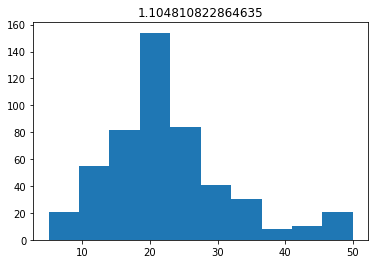

In [30]:
# 로그 변환
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

plt.hist(boston['target'])
plt.title(f"{skew(boston['target'])}")
plt.show()

## 데이터 분할

In [25]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(
    X, y, random_state = 100

)

## 모델 학습 및 평가

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)
# 이상치 제거하면 test 점수 올라간다. 

(0.7333970447189131, 0.7605037585652703)

# 경사 하강법

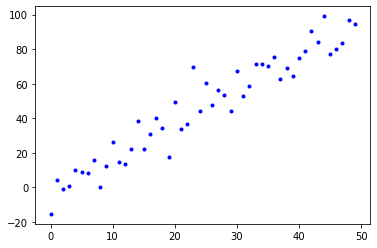

In [31]:
X = np.arange(50)
Y = (2 * X) + 10 * np.random.randn(50) # 0~1사이 난수 50갴
plt.plot(X, Y, 'b.')

# 다항회귀

In [33]:
X = X.reshape(-1,1)

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,Y)
model.score(X,Y)
model.coef_, model.intercept_

(array([2.00544287]), -2.6595683764615785)

In [35]:
pred = model.predict(X) # 예측값
pred

array([-2.65956838, -0.65412551,  1.35131736,  3.35676022,  5.36220309,
        7.36764596,  9.37308882, 11.37853169, 13.38397456, 15.38941742,
       17.39486029, 19.40030316, 21.40574602, 23.41118889, 25.41663176,
       27.42207462, 29.42751749, 31.43296036, 33.43840322, 35.44384609,
       37.44928896, 39.45473182, 41.46017469, 43.46561756, 45.47106042,
       47.47650329, 49.48194616, 51.48738902, 53.49283189, 55.49827476,
       57.50371762, 59.50916049, 61.51460336, 63.52004622, 65.52548909,
       67.53093196, 69.53637482, 71.54181769, 73.54726056, 75.55270342,
       77.55814629, 79.56358916, 81.56903202, 83.57447489, 85.57991776,
       87.58536062, 89.59080349, 91.59624635, 93.60168922, 95.60713209])

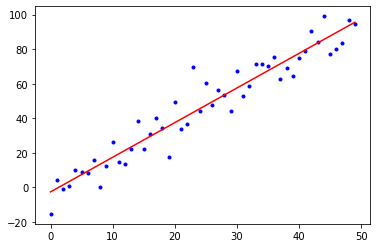

In [36]:
plt.plot(X, Y, 'b.')
plt.plot(X, pred, 'r-')

In [38]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(10).reshape(-1, 1)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,1,x0,x0^2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0
5,1.0,5.0,25.0
6,1.0,6.0,36.0
7,1.0,7.0,49.0
8,1.0,8.0,64.0
9,1.0,9.0,81.0


In [60]:
P = PolynomialFeatures(degree=5, include_bias=False)
x_poly = P.fit_transform(boston_df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)
boston_df.loc[:, 'CRIM':'LSTAT'].shape, x_poly.shape

((506, 13), (506, 8567))

In [61]:
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -135.30506302849497)